## Python Library Ecosystem Exercise: Parsing, Manipulating, and Exploring Patient Metadata

We are going to revisit the same public dataset of COVID-19 chest x-ray images as before. Now, instead of writing loops and iterating one-by-one over data entries, we are going to make use of python libraries and save ourselves a lot of coding and even gain speed!

To start, let's make sure the libraries are installed:

### Install Libraries

Open a command prompt or terminal and use `pip` to install the libraries.
```python
pip install numpy scipy matplotlib pandas scikit-image scikit-learn
```

Check these libraries are installed, either by printing the installed list of libraries:

```python
pip list
```

or open python in the terminal and attempt to import each one 

In [1]:
import importlib # this is only to import libraries in a loop by name. You would normally use 'import numpy' etc.

library_names = ['numpy', 'scipy', 'matplotlib', 'pandas', 'skimage', 'sklearn']

for lib in library_names:
    try:
        importlib.import_module(lib)
        print('imported, ', lib)
    except:
        print(lib, ' library not installed ...')

imported,  numpy
imported,  scipy
imported,  matplotlib
imported,  pandas
imported,  skimage
imported,  sklearn


## 1. Read in the metadata.csv using ```pandas```

In [2]:
# let's list the contents of the dataset repository
import os 

os.listdir('../datasets/covid-chestxray-dataset')

['.git',
 '.github',
 '.gitignore',
 '.gitkeep',
 'annotations',
 'docs',
 'images',
 'metadata.csv',
 'README.md',
 'requirements.txt',
 'SCHEMA.md',
 'scripts',
 'tests',
 'volumes']

As before, use a variable to store the dataset folder and construct filepath to metadata programmatically to help readability

In [3]:
dataset_folder = '../datasets/covid-chestxray-dataset'
metadata_file = os.path.join(dataset_folder,
                            'metadata.csv')
print(metadata_file) # Note the \ if on Windows. It looks weird, but will work fine

../datasets/covid-chestxray-dataset\metadata.csv


In [4]:
def pandas_read_csv(filepath):
    import pandas as pd # recommended to place import in function definition if you are not using it for many functions
    
    return pd.read_csv(filepath)

metadata_table = pandas_read_csv(metadata_file)

# you will see the data is nicely formatted now on print and 'NaN' is used for empty entries
print(metadata_table)

    patientid  offset sex   age                   finding RT_PCR_positive  \
0           2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1           2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2           2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3           2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4           4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   
..        ...     ...  ..   ...                       ...             ...   
945       479     0.0   F  40.0                 Pneumonia             NaN   
946       479    70.0   F  40.0                 Pneumonia             NaN   
947       480     NaN   M  26.0                 Pneumonia             NaN   
948       481     NaN   M  50.0                 Pneumonia             NaN   
949       481     NaN   M  50.0                 Pneumonia             NaN   

    survival intubated intubation_present went_icu  ...              date  

This structure makes it super easy to access contents. For example, the column names are keys. We can directly pull out all entries in the `patientid` column

In [5]:
col_subset = metadata_table.loc[:,'patientid':] # : denotes i want all.

print(col_subset)

    patientid  offset sex   age                   finding RT_PCR_positive  \
0           2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1           2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2           2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3           2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4           4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   
..        ...     ...  ..   ...                       ...             ...   
945       479     0.0   F  40.0                 Pneumonia             NaN   
946       479    70.0   F  40.0                 Pneumonia             NaN   
947       480     NaN   M  26.0                 Pneumonia             NaN   
948       481     NaN   M  50.0                 Pneumonia             NaN   
949       481     NaN   M  50.0                 Pneumonia             NaN   

    survival intubated intubation_present went_icu  ...              date  

### Indexing and slicing the table by rows, or columns 

`pandas.DataFrame` can be subset by row or columns using `.loc` (by logic or string) or `.iloc` (by numerical index) methods. 

In [6]:
import pandas as pd # re-import to make it available globally

# we can subset the first columns, from 'patientid' (1st column, index 0) up to 'RT_PCR_positive' (6th column, index 5) inclusive
subset_col_table_by_column_name = metadata_table.loc[:,'patientid':'RT_PCR_positive'] # subset by string
subset_col_table_by_column_index = metadata_table.iloc[:,0:6] # subset by string

print(subset_col_table_by_column_name) # note this looks table-like however a column is 1D and therefore a pandas.Series
print('==============================')
print(subset_col_table_by_column_index)
print('==============================')

# Let's find all rows associated with patientid=2
subset_patientid_2_data = metadata_table.loc[metadata_table['patientid'].values=='479']
subset_col_subset_patientid_2_data = subset_col_table_by_column_index.loc[metadata_table['patientid'].values=='479']

print('++++++++++++++++++++++++++++++')
print(subset_patientid_2_data)
print('++++++++++++++++++++++++++++++')
print(subset_col_subset_patientid_2_data)

    patientid  offset sex   age                   finding RT_PCR_positive
0           2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y
1           2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y
2           2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y
3           2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y
4           4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y
..        ...     ...  ..   ...                       ...             ...
945       479     0.0   F  40.0                 Pneumonia             NaN
946       479    70.0   F  40.0                 Pneumonia             NaN
947       480     NaN   M  26.0                 Pneumonia             NaN
948       481     NaN   M  50.0                 Pneumonia             NaN
949       481     NaN   M  50.0                 Pneumonia             NaN

[950 rows x 6 columns]
    patientid  offset sex   age                   finding RT_PCR_positive
0           2 

In [7]:
# be careful after subsetting by row if doing it by name, this is because the row index doesn't change!, so the name is that of the original!

print('subsetting by index works')
print(subset_col_subset_patientid_2_data.iloc[0])

print('=================================')
print('=================================')
print('subsetting by name must use the name in original table, else you will get keyerror')
print(subset_col_subset_patientid_2_data.loc[0])

subsetting by index works
patientid                479
offset                   0.0
sex                        F
age                     40.0
finding            Pneumonia
RT_PCR_positive          NaN
Name: 945, dtype: object
subsetting by name must use the name in original table, else you will get keyerror


KeyError: 0

There are some quirks for working directly with `pandas.Series`, `pandas.DataFrame` and performing mathematical or plotting operations using e.g. `numpy` and `matplotlib`. Therefore it is valuable to know how to convert to pure `numpy` arrays. The downside is that we lose the associated row and columns information. 

### Let's compare Pandas vs Our Pure Python naive line-by-line csv reading code

First let's define a function for the previous line-by-line reading code

In [9]:
def read_csv_line_by_line(filepath):
    
    metadata_contents = []

    with open(metadata_file, 'r', encoding='utf-8') as f:
        for line in f: # note the for loop iteration.
            # strip blank space, split by comma
            line_contents = line.strip().split(',')
            # append into empty list
            metadata_contents.append(line_contents)

    return metadata_contents

We use the `time` function from the `time` python module to time both approaches to reading the .csv file

In [10]:
import time

# first time pandas
t1_pandas = time.time() # start the clock
metadata_table_pandas = pandas_read_csv(metadata_file) 
t2_pandas = time.time() # stop the clock
print('pandas reading time: ', t2_pandas-t1_pandas)

# second time pure python line-by-line
t1_python = time.time()
metadata_table_python = read_csv_line_by_line(metadata_file)
t2_python = time.time()
print('python reading time: ', t2_python-t1_python)

pandas reading time:  0.012913942337036133
python reading time:  0.004980325698852539


**Wow! pure python was faster than pandas!** This is a little bit of a warning. Library does not equal fast. A single function may be hiding many steps underneath which slow-down the code. 

Our test here was a little unfair, since we don't return an array. Let's use numpy to revise the line-by-line code to return the column names and an array of values, which is effectively what pandas offers. 

In [11]:
def read_csv_line_by_line_numpy(filepath):
    import numpy as np
    
    metadata_contents = []

    with open(metadata_file, 'r', encoding='utf-8') as f:
        for line in f: # note the for loop iteration.
            # strip blank space, split by comma
            line_contents = line.strip().split(',')
            # append into empty list
            metadata_contents.append(line_contents)
    columns = np.hstack(metadata_contents[0]) # this is the first line of file, and we use np.hstack to turn into 1D array
    data = np.array(metadata_contents[1:],dtype=object) # we use np.array to convert the rest to numpy array

    return data, columns # note we return two things now.

# third time pure python line-by-line with numpy array conversion
t1_python_numpy = time.time()
metadata_table_numpy, metadata_table_columns = read_csv_line_by_line_numpy(metadata_file)
t2_python_numpy = time.time()

print('pandas reading time: ', t2_pandas-t1_pandas)
print('python reading time: ', t2_python-t1_python)
print('python + numpy conversion reading time: ', t2_python_numpy-t1_python_numpy)

pandas reading time:  0.012913942337036133
python reading time:  0.004980325698852539
python + numpy conversion reading time:  0.005939960479736328


python + numpy conversion is still faster! but there is a problem. We have a warning of ragged nested sequences. This is not good. A table should be a regular n_rows x n_cols matrix. 

We check the shape of the numpy array:

In [12]:
print('python + numpy data shape', metadata_table_numpy.shape)

python + numpy data shape (950,)


This is 1-dimensional when it should be 2!

What's the problem? It is because our code is splitting each line by looking for commans ','. However, the comma is not exclusively separating columns. Some column entries such as `data`, and `clinical_notes` contain ',' in their text! 

`pandas` was able to correctly read the table as it incorporates proof-checking, based on the expected number of columns, parsed from the first line. We need to write much more code to detect and correct for the extra commas. This is generally not worth it and we might not get it right! More general handling and treatment of potential errors is why even though it may be slower, it is better practice to use a well-developed library.  

You will now write control statements using the metadata_contents list :

Try to do as many as you can - you can team up.

## 2. Getting the data we want from the metadata table, now using library functions

We can revisit the exercises you previously did with loops and replace them. We can also start viewing the associated images.

#### Exercise 1: Create an array for `patientid` from `metadata_table`. Hint: answer already given above.

In [13]:
# Feel free to write code in here, or else use your favorite Python IDE.

patientid = metadata_table['patientid'].values

#### Exercise 2: Find the number of unique `patientid` as well as the unique ids . Hint: `numpy.unique`

In [14]:
# Feel free to write code in here, or else use your favorite Python IDE.
import numpy as np

unique_patientid = np.unique(patientid)

print('Found %d unique patient ids' %(len(unique_patientid)))
print(unique_patientid[:100]) # print the first 100

Found 472 unique patient ids
['10' '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '11'
 '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '12' '120'
 '121' '122' '123' '124' '125' '126' '127' '128' '129' '13' '130' '131'
 '132' '133' '134' '135' '136' '137' '138' '139' '14' '140' '141' '142'
 '143' '144' '145' '146' '147' '148' '149' '15' '150' '151' '152' '153'
 '154' '155' '156' '157' '158' '159' '16' '160' '161' '162' '163' '164'
 '165' '166' '167' '168' '169' '17' '170' '171' '172' '173' '174' '175'
 '176' '177' '178' '179' '18' '180' '181' '182' '183' '184' '185' '187'
 '188' '189' '19' '190']


#### Exercise 3: Find the `age` of each unique `patientid`.

In [15]:
# Feel free to write code in here, or else use your favorite Python IDE.

"""
# solution 1: We can use pandas subsetting and .groupby method
"""
age_table_grouped = metadata_table.loc[:,['patientid','age']].groupby('patientid').mean()
print('====================')
print('using pandas groupby')
print(age_table_grouped)

# patients is retrieved by the index 
patients = age_table_grouped.index.values
# age is the entries of this table
age = age_table_grouped['age'].values

# note we have NaN where some patients don't have age recorded. 


"""
# solution 2: Use a for loop over the patients.
"""
age_patients = []

for patient_ii in unique_patientid:
    # subset the data table
    patient_ii_age = metadata_table.loc[metadata_table['patientid'].values==patient_ii,'age']
    # there may be multiple, so take the first 
    patient_ii_age = patient_ii_age.iloc[0]
    age_patients.append(patient_ii_age)

age_patients = np.hstack(age_patients)
print('====================')
print('using numpy for loop')
print(age_patients)

using pandas groupby
            age
patientid      
10         73.0
100        62.0
101        40.0
102         NaN
103         NaN
...         ...
95         70.0
96         60.0
97         70.0
98         75.0
99         55.0

[472 rows x 1 columns]
using numpy for loop
[73. 62. 40. nan nan nan nan 50. 25. 50. 70. 56. 60. 45. nan nan nan nan
 55. 50. 71. 61. 42. 47. 50. 41. 46. 32. 41. 38. 64. 55. 50. 35. 50. 50.
 70. 25. 40. 80. 35. 83. 77. 45. nan 60. 65. 65. 65. 30. 35. 85. 50. 41.
 40. nan 28. nan nan nan nan nan nan nan nan nan 59. 44. 71. 45. 70. 75.
 nan 50. 75. 35. 60. 54. 23. 23. 76. 70. 30. 85. nan nan 72. 56. 53. 61.
 53. 34. 30. 29. 78. 50. 70. 61. 55. 58. 70. nan 83. 64. 83. 73. 72. 74.
 65. 65. nan 88. 77. 83. 45. 45. 55. 48. 62. 83. 59. 50. 27. 39. 43. 46.
 43. 38. 58. 22. 39. nan 70. nan nan nan nan nan nan nan nan nan 70. nan
 nan nan nan nan nan nan nan 75. nan nan nan nan nan nan nan nan nan nan
 50. nan nan nan nan nan nan nan nan nan nan 65. nan nan nan nan nan 

#### Exercise 4: Find the `finding` of each unique `patientid`. How many unique `finding` are there?

In [16]:
# Feel free to write code in here, or else use your favorite Python IDE.

# The solution is effectively the same as the previous, but groupby isn't so useful when you have textual inputs. 
# We will use the for loop with numpy

"""
Get the finding for each unique patient
"""
finding_patients = []

for patient_ii in unique_patientid:
    # subset the data table
    patient_ii_finding = metadata_table.loc[metadata_table['patientid'].values==patient_ii,'finding']
    # there may be multiple, but they will be identical, so take the first 
    patient_ii_finding = patient_ii_finding.iloc[0]
    finding_patients.append(patient_ii_finding)

finding_patients = np.hstack(finding_patients)
print('====================')
print('using numpy for loop')
print(finding_patients)


"""
apply np.unique to get the unique entries of this
"""
unique_findings = np.unique(finding_patients)

print('===================================================')
print('We found %d unique findings' %(len(unique_findings)))
print(unique_findings)

# you can see the findings are coarse or finer-grained where '/' is used to denote a hierarchy. We see they are all pneumonia patients either from bacterial or viral infections

using numpy for loop
['Pneumonia/Viral/SARS' 'Pneumonia/Bacterial/Klebsiella'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Fungal/Pneumocystis'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Fungal/Pneumocystis'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Fungal/Pneumocystis'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Fungal/Pneumocystis'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Bacterial/Legionella' 'Pneumonia/Bacterial/Legionella'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/COVID-19'
 'Pneumonia/Viral/COVID-19' 'Pneumonia/V

## 3. Exploring and visualizing the data

We can use the various libraries to make plots, and explore the data further to get some insights.

####  Exercise 5: Plot a histogram of `age` using matplotlib. You can import matplotlib with `import pylab as plt`

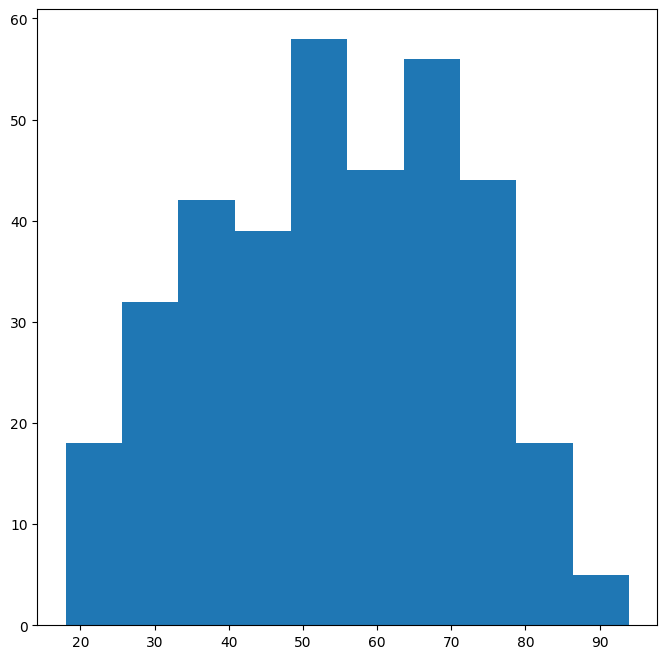

In [17]:
# Feel free to write code in here, or else use your favorite Python IDE.

# age contains NaN values. 
import pylab as plt

plt.figure(figsize=(8,8))
plt.hist(age_patients, bins=10) # adjust the number of bins, range is automatically determined. 
plt.show()

####  Exercise 6: Find the ages of patients for each unique `finding`. How many patients are there in each? Make a boxplot using `matplotlib`. Use `scipy.stats.ttest_ind` to perform an unpaired t-test to test for age differences in two of the unique findings.

number of patients per unique finding
0 No Finding 15
1 Pneumonia 38
2 Pneumonia/Aspiration 1
3 Pneumonia/Bacterial 1
4 Pneumonia/Bacterial/Chlamydophila 1
5 Pneumonia/Bacterial/E.Coli 1
6 Pneumonia/Bacterial/Klebsiella 5
7 Pneumonia/Bacterial/Legionella 6
8 Pneumonia/Bacterial/Mycoplasma 3
9 Pneumonia/Bacterial/Nocardia 1
10 Pneumonia/Bacterial/Staphylococcus/MRSA 1
11 Pneumonia/Bacterial/Streptococcus 9
12 Pneumonia/Fungal/Aspergillosis 2
13 Pneumonia/Fungal/Pneumocystis 13
14 Pneumonia/Lipoid 6
15 Pneumonia/Viral/COVID-19 230
16 Pneumonia/Viral/Herpes  1
17 Pneumonia/Viral/Influenza 3
18 Pneumonia/Viral/Influenza/H1N1 1
19 Pneumonia/Viral/MERS-CoV 0
20 Pneumonia/Viral/SARS 8
21 Pneumonia/Viral/Varicella 2
22 Tuberculosis 9
23 Unknown 0
24 todo 0


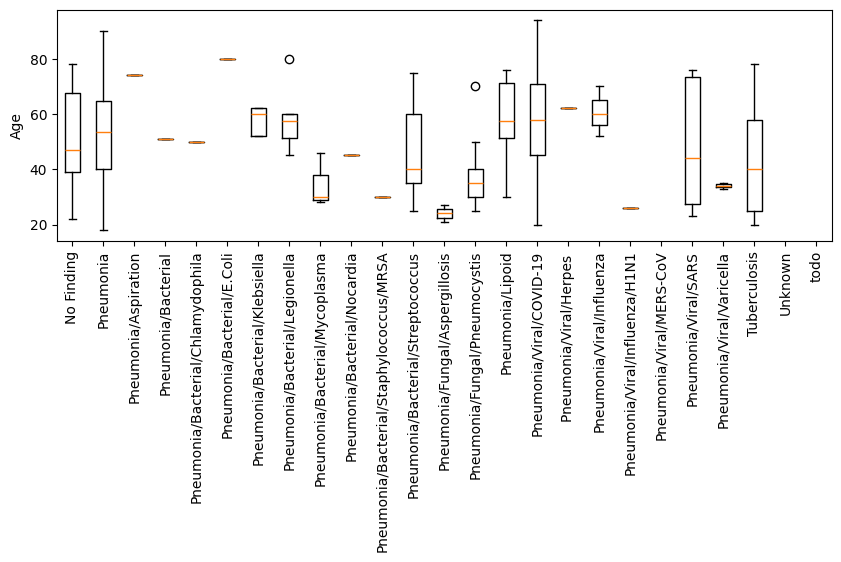

Are COVID-19 patients older than tubercolosis? 2.5398899875985013 0.011728727538956547 True
Are COVID-19 patients older than no finding? 1.3375562110988648 0.18229168037532778 False


In [18]:
# Feel free to write code in here, or else use your favorite Python IDE.

# for each finding tabulate the age of patients.
age_finding = []

for finding in unique_findings:
    age_finding_patients = age_patients[finding_patients==finding]
    # detect and remove nan which don't contribute
    age_finding_patients = age_finding_patients[np.isnan(age_finding_patients)==0]
    age_finding.append(age_finding_patients)

print('number of patients per unique finding')
for finding_ii, finding in enumerate(unique_findings):
    print(finding_ii, finding, len(age_finding[finding_ii])) #np.mean(age_finding[finding_ii]))
    
# perform a boxplot to get idea of patient numbers and distribution 
plt.figure(figsize=(10,3))
plt.boxplot(age_finding)
plt.xticks(np.arange(len(age_finding))+1, unique_findings, rotation=90)
plt.ylabel('Age')
plt.show()


# perform an unpaired t-test to see if covid19 (index 15) is older than tubercolosis (index 22)
import scipy.stats as spstats

test_stat, pvalue = spstats.ttest_ind(age_finding[15], age_finding[22])
print('Are COVID-19 patients older than tubercolosis?', test_stat, pvalue, pvalue<0.05)

# perform the same test to see if covid19 (index 15) is older than no finding (index 0)
test_stat, pvalue = spstats.ttest_ind(age_finding[15], age_finding[0])
print('Are COVID-19 patients older than no finding?', test_stat, pvalue, pvalue<0.05)

####  Exercise 7: Write code to find the image path/s associated with each unique patient. Use `scikit-image` to read and `matplotlib` to display them.  

['../datasets/covid-chestxray-dataset\\images\\SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg', '../datasets/covid-chestxray-dataset\\images\\SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg', '../datasets/covid-chestxray-dataset\\images\\SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg']


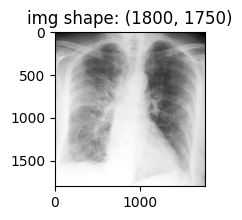

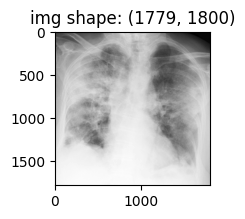

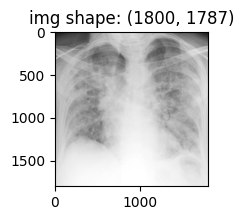

In [19]:
# Feel free to write code in here, or else use your favorite Python IDE.

# the associated images is found in the 'folder' and 'filename' columns
# we anticipate multiple image files per patient id. therefore we can use a dict to store this instead of list

imagefiles_patients = {} # initialize empty dict which we can create new stuff. 

for patient_ii in unique_patientid[:]:
    # subset the data table
    patient_ii_folder = metadata_table.loc[metadata_table['patientid'].values==patient_ii,'folder'].values
    patient_ii_filename = metadata_table.loc[metadata_table['patientid'].values==patient_ii,'filename'].values
   
    # construct the full image paths. 
    patient_ii_imgfiles = [os.path.join(dataset_folder, patient_ii_folder[jj], patient_ii_filename[jj]) for jj in np.arange(len(patient_ii_filename))]
    
    # write this into the dictionary
    imagefiles_patients[patient_ii] = patient_ii_imgfiles

# now we can use the patient id to get the files associated with the 1st unique id 
print(imagefiles_patients[unique_patientid[0]])

# using scikit-image to read in all images for the first unique id, and use matplotlib to display
import skimage.io as skio 
import pylab as plt

imagefiles_patient_0 = imagefiles_patients[unique_patientid[0]]
images_patient_0 = [skio.imread(ff) for ff in imagefiles_patient_0]

for img in images_patient_0:
    plt.figure(figsize=(2,2))
    plt.title('img shape: %s' %(str(img.shape)))
    plt.imshow(img, cmap='gray') # use cmap to display grayscale 
    plt.show()

## Extension: Relating images and metadata to disease variables

The key objective of data analysis particularly in the medical domain is to understand potential parameters related to disease. For this dataset, we have available in `annotations` folder provided covid severity scores for a subset of images. This is described in the paper, https://arxiv.org/pdf/2005.11856.

You will load this file in as a data table, matching the contents to their respective image files to perform some analysis.

#### Extension exercise 1: (Read in covid severity score and match with file)

In [22]:
# the file path is the following
covid_severity_score_file = os.path.join(dataset_folder, 
                                        'annotations',
                                        'covid-severity-scores.csv')

# a) take a look at this file in excel or equivalent. Is this in the format of the table? How would you try to read it in?

In [24]:
# Feel free to write code in here, or else use your favorite Python IDE. 

# you will note that the first 3 lines appear to be some header information and not the actual table. The actual data starts from row 6
# if we read the docs for pd.read_csv, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. We see we can pass a header to specify the start line.
covid_severity_score_table = pd.read_csv(covid_severity_score_file, 
                                        header=5)
print(covid_severity_score_table)

                                     filename  geographic_mean  opacity_mean
0   01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg              6.0           4.0
1   03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg              2.7           2.0
2        1-s2.0-S0140673620303706-fx1_lrg.jpg              2.0           2.0
3   1-s2.0-S1684118220300608-main.pdf-001.jpg              3.7           3.0
4   1-s2.0-S1684118220300608-main.pdf-002.jpg              1.7           1.7
..                                        ...              ...           ...
89                 ryct.2020200028.fig1a.jpeg              2.0           1.7
90                  ryct.2020200034.fig2.jpeg              1.3           1.3
91             ryct.2020200034.fig5-day0.jpeg              3.7           3.3
92             ryct.2020200034.fig5-day4.jpeg              5.7           4.0
93             ryct.2020200034.fig5-day7.jpeg              4.3           4.0

[94 rows x 3 columns]


In [26]:
# b) Note there is a 'filename' column in this table, There is also another in the master metadata_table we had read in. How could we combine the two tables? 
# HINT: pandas.merge

merge_meta_table = pd.merge(left=metadata_table, 
                           right=covid_severity_score_table, 
                           left_on='filename',
                           right_on='filename')

# this new table appends the entries of the second time 
print(merge_meta_table)
print(merge_meta_table.columns)

   patientid  offset  sex   age                   finding RT_PCR_positive  \
0          2     0.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
1          2     3.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
2          2     5.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
3          2     6.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
4          4     0.0    F  52.0  Pneumonia/Viral/COVID-19               Y   
..       ...     ...  ...   ...                       ...             ...   
88       114     7.0  NaN   NaN  Pneumonia/Viral/COVID-19         Unclear   
89       115     0.0  NaN   NaN  Pneumonia/Viral/COVID-19         Unclear   
90       115     5.0  NaN   NaN  Pneumonia/Viral/COVID-19         Unclear   
91       117     0.0    M  50.0  Pneumonia/Viral/COVID-19         Unclear   
92       118     3.0    F  71.0  Pneumonia/Viral/COVID-19               Y   

   survival intubated intubation_present went_icu  ...  folder  \
0        

In [29]:
# c) check these patients are all covid19, check the uniqueness of patient with respect to number of rows.

print(np.unique(merge_meta_table['finding']))
print(len(np.unique(merge_meta_table['patientid'])))

['Pneumonia/Viral/COVID-19']
64


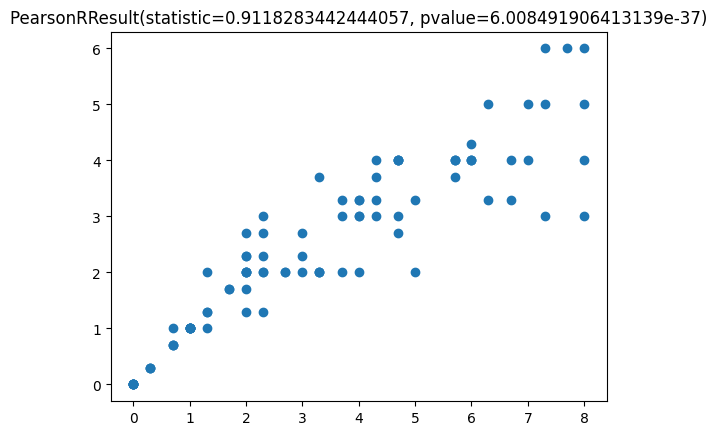

In [31]:
# d) Is there a relationship between the 2 severity scores? - you can answer with a plot. Is there a way you can quantify the degree of correlation?

import scipy.stats as spstats

plt.figure()
plt.title(spstats.pearsonr(merge_meta_table['geographic_mean'], 
                          merge_meta_table['opacity_mean']))
plt.plot(merge_meta_table['geographic_mean'],
        merge_meta_table['opacity_mean'], 
        'o')
plt.xlabel('')
plt.show()

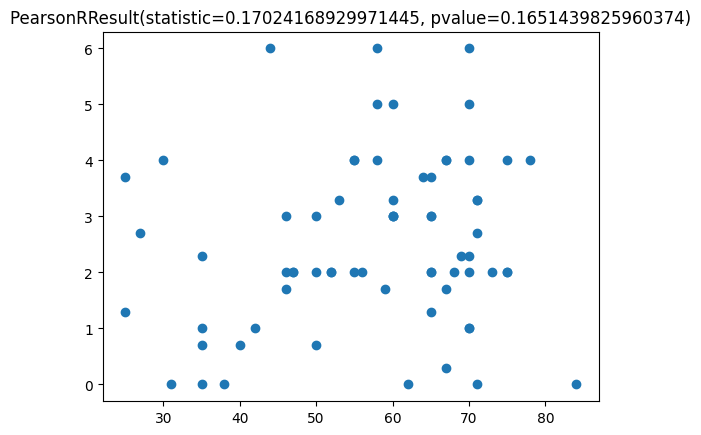

In [35]:
# e) is there a relationship between covid severity and age?

age = merge_meta_table['age'].values
opacity_mean = merge_meta_table['opacity_mean'].values

valid = np.isnan(age) == 0
age = age[valid]
opacity_mean = opacity_mean[valid]

plt.figure()
plt.title(spstats.pearsonr(age, 
                          opacity_mean))
plt.plot(age,
        opacity_mean, 
        'o')
plt.xlabel('age')
plt.ylabel('severity')
plt.show()

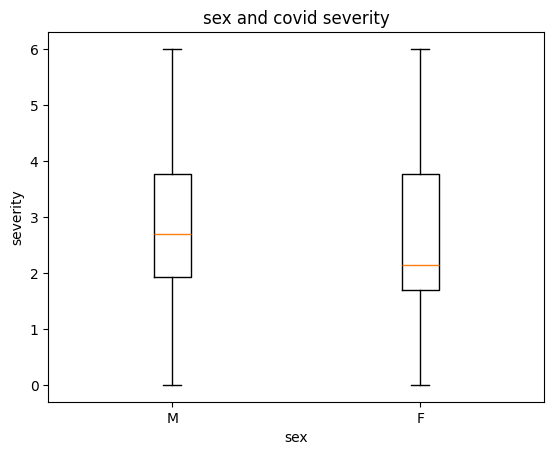

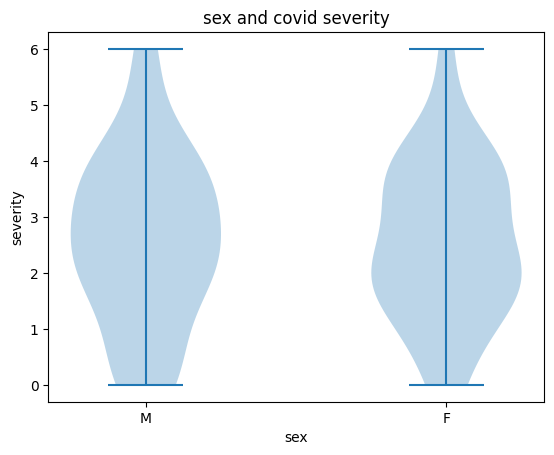

is there a statistical difference between the two sexes? 0.9200164100237371 False


In [52]:
# f) is there a relationship between covid severity and sex?

# sex is a categorical parameter, therefore we should group the data and try boxplot or violinplot and apply e.g. hypothesis testing.
 
sex = merge_meta_table['sex'].values
opacity_mean = merge_meta_table['opacity_mean'].values

valid = []
for item in sex:
    if item=='M' or item=='F':
        valid.append(True)
    else:
        valid.append(False)

sex = sex[valid]
opacity_mean = opacity_mean[valid]

sex_opacity_mean = [opacity_mean[sex==sex_type] for sex_type in ['M','F']]

# boxplot
plt.figure()
plt.title('sex and covid severity')
plt.boxplot(sex_opacity_mean)
plt.xticks([1,2], ['M','F'])
plt.xlabel('sex')
plt.ylabel('severity')
plt.show()

# violinplot
plt.figure()
plt.title('sex and covid severity')
plt.violinplot(sex_opacity_mean)
plt.xticks([1,2], ['M','F'])
plt.xlabel('sex')
plt.ylabel('severity')
plt.show()


test_statistic, p_value = spstats.ttest_ind(sex_opacity_mean[0],sex_opacity_mean[1])
print('is there a statistical difference between the two sexes?', p_value, p_value<0.05)

#### Let's try to play a little with images, with the tools we have. 

Generally, working directly on individual pixel intensity is not very informative. Consequently, features are extracted from images to form a vector per image which is then input to machine learning algorithms. This is basically what a neural network does. Here we will just explore this a little using the tools available in scikit-image and scikit-learn, just to give you an idea.

#### Extension exercise 2: (PCA on raw image intensities) 
Read in each image of the merged table using `scikit-image`. (what do you do if images are different size?). An image is 2-dimensional, you will then flatten the image into 1D vector to apply PCA to. 

(93, 16384)
(93, 2)


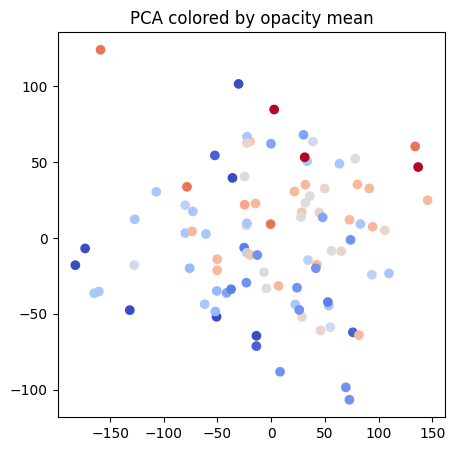

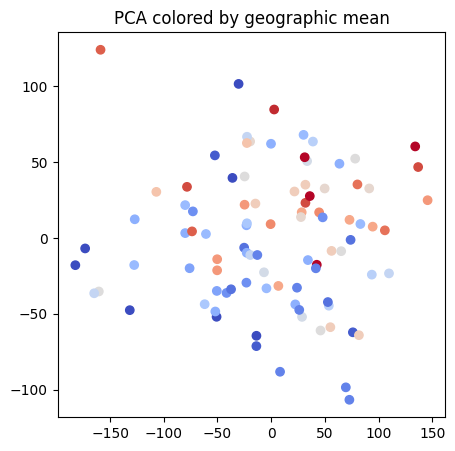

In [63]:
# Feel free to write code in here, or else use your favorite Python IDE. 

# we should get the patientid based on the merged table now. 
patientid = merge_meta_table['patientid'].values
imagefiles_patients = np.hstack([os.path.join(dataset_folder, 
                                             merge_meta_table['folder'].iloc[idx], 
                                             merge_meta_table['filename'].iloc[idx]) for idx in np.arange(len(merge_meta_table))])

import skimage.transform as sktform

# 1. Write a loop over unique patients and use one image to describe him/her, if there are multiple e.g. the first image file.
imgs_patients = []
analyze_finding_patients = []
analyze_patients = []

for index_patient_ii, patient_ii in enumerate(patientid[:]):
    imgfile_patient = imagefiles_patients[index_patient_ii]
    img_patient = skio.imread(imgfile_patient)
    
    if len(img_patient.shape) == 3:
        img_patient = img_patient[...,1] # take the green channel
    
    # image is different size, so we are going to resize it. 
    img_patient = sktform.resize(img_patient, output_shape=(128,128), preserve_range=True)
    imgs_patients.append(img_patient)
    analyze_patients.append(patient_ii)
    analyze_finding_patients.append(merge_meta_table['finding'].iloc[index_patient_ii]) # so we can do some color overlay

    
# 2. For each patient image, read it in using img=skimage.io.imread(imgfile), if color i.e. img.shape is 3 numbers, last of which is 3. then make it grayscale e.g. using skimage.color.rgb2gray

# 3. Flatten the image to form a 1-D vector, i.e. img_flat = img.ravel(). 
imgs_patients_flat = np.vstack([im.ravel() for im in imgs_patients])
print(imgs_patients_flat.shape)

# 4. Perform PCA of all flattened images using scikit-learn library into 2 dimension i.e. n_components=2. This is done using sklearn.decomposition.PCA. See example at https://scikit-learn.org/1.5/auto_examples/decomposition/plot_pca_iris.html for example usage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

imgs_patients_flat_normalize = StandardScaler().fit_transform(imgs_patients_flat)
pca_coords = PCA(n_components=2).fit_transform(imgs_patients_flat_normalize)

print(pca_coords.shape)

# 5. Use matplotlib to plot the 2-dimensions, and color by the severity score, either doesn't matter

plt.figure(figsize=(5,5))
plt.title('PCA colored by opacity mean')
plt.scatter(pca_coords[:,0], 
            pca_coords[:,1],
           c=merge_meta_table['opacity_mean'].values,
           cmap='coolwarm')
plt.show()

plt.figure(figsize=(5,5))
plt.title('PCA colored by geographic mean')
plt.scatter(pca_coords[:,0], 
            pca_coords[:,1],
           c=merge_meta_table['geographic_mean'].values,
           cmap='coolwarm')
plt.show()

#### Extension exercise 3: (Train a binary SVM classifier to predict covid severity based on image)

From the PCA it looks like we might be able to binary separate hi and low severity from image intensity. Therefore lets do the following:

1) plot a histogram of severity score and choose a cutoff to designate 'high' = 1 and 'low' = 0
2) split the data into 50-50 train-test, using 50% to fit the SVM, and the other 50% to test performance. 

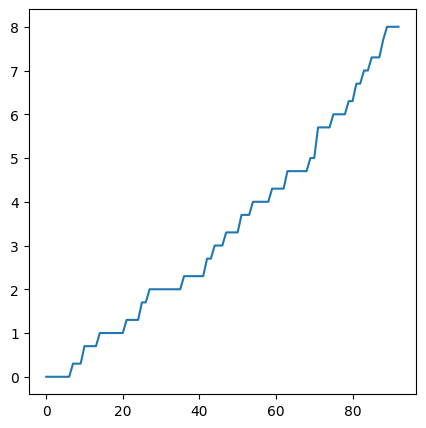

4.0


In [69]:
# Feel free to write code in here, or else use your favorite Python IDE.

# write code to:
# 1) plot a sorted severity score (low to hight) to help choose a cutoff value to designate 'high' = 1 and 'low' = 0
# then create a new binary variable 

plt.figure(figsize=(5,5))
plt.plot(np.sort(merge_meta_table['geographic_mean'].values))
plt.show()

# it looks linear therefore use the middle value of highest and lowest 
cutoff_threshold = .5*(merge_meta_table['geographic_mean'].values.min()+merge_meta_table['geographic_mean'].values.max())
print(cutoff_threshold)

# this is our new binary label 
hi_low_covid = merge_meta_table['geographic_mean'].values >= cutoff_threshold

              precision    recall  f1-score   support

       False       0.75      0.54      0.62        28
        True       0.52      0.74      0.61        19

    accuracy                           0.62        47
   macro avg       0.63      0.64      0.62        47
weighted avg       0.66      0.62      0.62        47



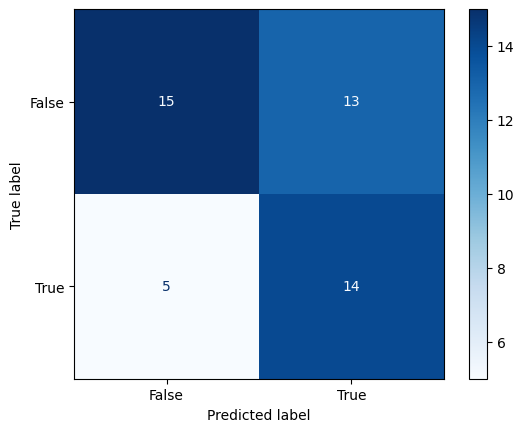

In [81]:
# write code to:

# 2a) split the data into 50-50 train-test. Hint: sklearn.model_selection.train_test_split function 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imgs_patients_flat_normalize, 
                                                    hi_low_covid, 
                                                    test_size=0.5, 
                                                    random_state=0)

# 2b) train linear SVM model using the train data and labels. Hint: sklearn.svm.LinearSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


from sklearn.svm import LinearSVC

# fit the svm on the train, making sure to balanced 
svm = LinearSVC().fit(X_train, y_train)


# predict on the test
predictions = svm.predict(X_test)


# 2c) compute classification report and display a confusion matrix to test performance. 
# Hint: check out https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_fisher_vector.html

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, predictions))

ConfusionMatrixDisplay.from_estimator(
    svm,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)

plt.show()